In [42]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [43]:
#!pip install sklearn

In [44]:
#!pip install -U scikit-learn==1.1.0

In [45]:
#!pip uninstall numpy

# Day 13. Task 02
# Бинарный классификатор. SVM. Дерево классификаций

## 0. Импорты

In [81]:
df = pd.read_csv('../data/am_pm.csv')

## 1. Препроцессинг данных и визуализация работы логрегрессии

[sklearn.inspection. DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)

Прочитайте файл `am_pm.csv` с прошлого задания в датафрейм.

In [47]:
df

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day
5,2020-04-22,working_day,0,28,working_day
6,2020-04-23,working_day,10,33,working_day
7,2020-04-24,working_day,2,14,working_day
8,2020-04-25,weekend,30,74,working_day
9,2020-04-26,weekend,28,233,working_day


**1. Нарисуйте график, где ось икс – это am, а ось игрек – это pm. Каждая точка – это конкретный день. Рабочие дни и выходные должны иметь разные цвета на графике.**


<AxesSubplot:xlabel='am', ylabel='pm'>

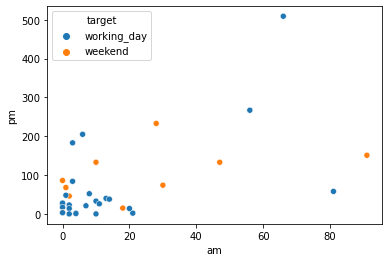

In [48]:
sns.scatterplot(data=df, x='am', y='pm', hue='target')

**2. Добавьте разделяющие границы (decision boundaries) логрегрессии на график.**

In [49]:
logreg = LogisticRegression(random_state=21, fit_intercept=False).fit(df[['am', 'pm']], df.target)

<AxesSubplot:xlabel='am', ylabel='pm'>

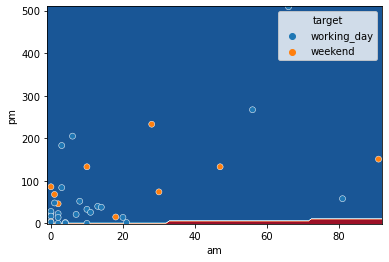

In [50]:
DecisionBoundaryDisplay.from_estimator(
        logreg,
        X=df[['am', 'pm']],
        response_method="predict",
        cmap="RdBu")
sns.scatterplot(data=df, x='am', y='pm', hue='target')

**3. Нарисуйте точно такой же график, но теперь цвет зависит от значения столбца с прогнозом.**

<AxesSubplot:xlabel='am', ylabel='pm'>

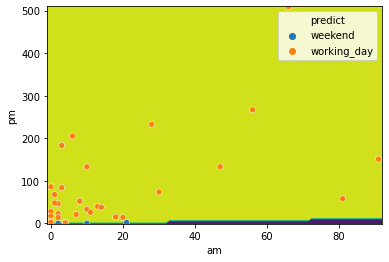

In [51]:
DecisionBoundaryDisplay.from_estimator(
        logreg,
        X=df[['am', 'pm']],
        response_method="predict")
sns.scatterplot(data=df, x='am', y='pm', hue='predict')


Теперь вам должно стать понятно, как работает логистическая регрессия.

## 2. Стандартизация и логрегрессия

Линейные модели могут быть чувствительны к шкалам ваших признаков. Чтобы снизить эту чувствительность и повысить вероятность более точного прогноза, как вы уже знаете, лучше шкалы ваших признаков стандартизировать.

**1. Примените `StandardScaler` к признакам и заново обучите логистическую регрессию, используя те же самые параметры.**

[sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
df[['am', 'pm']] = StandardScaler().fit_transform(df[['am', 'pm']])
df

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,weekend
1,2020-04-18,weekend,-0.655914,-0.071822,working_day
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day
5,2020-04-22,working_day,-0.698744,-0.464599,working_day
6,2020-04-23,working_day,-0.270442,-0.415502,working_day
7,2020-04-24,working_day,-0.613084,-0.602071,working_day
8,2020-04-25,weekend,0.586162,-0.012906,working_day
9,2020-04-26,weekend,0.500501,1.548382,working_day


In [54]:
logreg_scaler = LogisticRegression(random_state=21, fit_intercept=False).fit(df[['am', 'pm']], df.target)

In [55]:
df['predict'] = logreg_scaler.predict(df[['am', 'pm']])
df

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,working_day
1,2020-04-18,weekend,-0.655914,-0.071822,working_day
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day
5,2020-04-22,working_day,-0.698744,-0.464599,working_day
6,2020-04-23,working_day,-0.270442,-0.415502,working_day
7,2020-04-24,working_day,-0.613084,-0.602071,working_day
8,2020-04-25,weekend,0.586162,-0.012906,weekend
9,2020-04-26,weekend,0.500501,1.548382,weekend


**2. Посчитайте `accuracy` для новой модели. Теперь модель стала лучше наивного прогноза с самым популярным классом в качестве значения?**

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(df.target, df.predict)

0.7428571428571429

**3. Нарисуйте снова графики, как выше, но только для новой модели.**

<AxesSubplot:xlabel='am', ylabel='pm'>

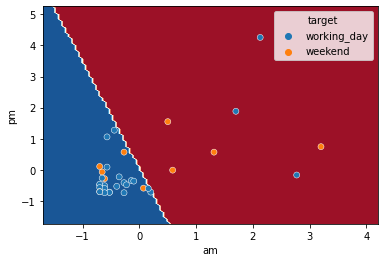

In [58]:
DecisionBoundaryDisplay.from_estimator(
        logreg_scaler,
        X=df[['am', 'pm']],
        response_method="predict",
        cmap="RdBu")
sns.scatterplot(data=df, x='am', y='pm', hue='target')

<AxesSubplot:xlabel='am', ylabel='pm'>

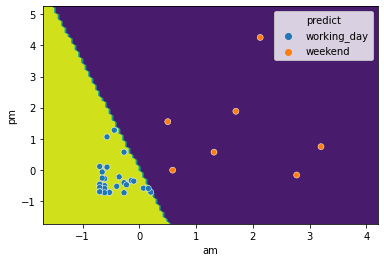

In [59]:
DecisionBoundaryDisplay.from_estimator(
        logreg_scaler,
        X=df[['am', 'pm']],
        response_method="predict")
sns.scatterplot(data=df, x='am', y='pm', hue='predict')

## 3. SVM

In [60]:
 from sklearn.svm import SVC

**1. Обучите модель `SVC`, используя стандартизированные признаки, и принимая во внимание параметры `probability=True`, `random_state=21`.**

In [61]:
svc = SVC(probability=True, random_state=21).fit(df[['am', 'pm']], df.target)

In [62]:
df['predict'] = svc.predict(df[['am', 'pm']])
df

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,working_day
1,2020-04-18,weekend,-0.655914,-0.071822,working_day
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day
5,2020-04-22,working_day,-0.698744,-0.464599,working_day
6,2020-04-23,working_day,-0.270442,-0.415502,working_day
7,2020-04-24,working_day,-0.613084,-0.602071,working_day
8,2020-04-25,weekend,0.586162,-0.012906,working_day
9,2020-04-26,weekend,0.500501,1.548382,working_day


**2. Посчитайте `accuracy`.**

In [63]:
svc.score(df[['am', 'pm']], df.target) # по умолчению kernel='rbf'

0.7428571428571429

**3. Попробуйте разные кернелы и найдите лучший с точки зрения этой метрики.**

In [64]:
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

In [65]:
svc_linear = SVC(probability=True, random_state=21, kernel='linear').fit(df[['am', 'pm']], df.target)
svc_linear.score(df[['am', 'pm']], df.target)

0.7142857142857143

In [66]:
svc_poly = SVC(probability=True, random_state=21, kernel='poly').fit(df[['am', 'pm']], df.target)
svc_poly.score(df[['am', 'pm']], df.target)

0.7428571428571429

In [67]:
svc_sigmoid = SVC(probability=True, random_state=21, kernel='sigmoid').fit(df[['am', 'pm']], df.target)
svc_sigmoid.score(df[['am', 'pm']], df.target)

0.6857142857142857

Лучший кернел: **rbf и poly** (одинаковые значения)

**4. Нарисуйте снова два графика вместе с разделяющими границами, но уже для этого алгоритма, чтобы увидеть, каким образом работает он.**

<AxesSubplot:xlabel='am', ylabel='pm'>

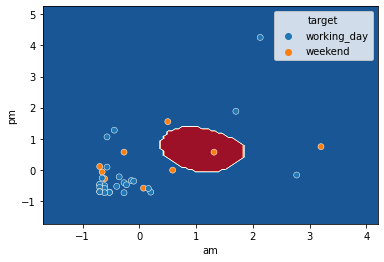

In [68]:
DecisionBoundaryDisplay.from_estimator(
        svc,
        X=df[['am', 'pm']],
        response_method="predict",
        cmap="RdBu")
sns.scatterplot(data=df, x='am', y='pm', hue='target')

<AxesSubplot:xlabel='am', ylabel='pm'>

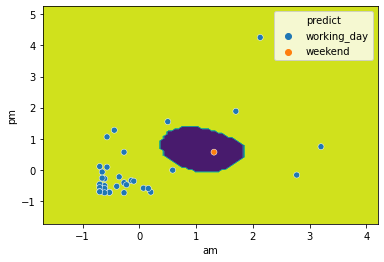

In [69]:
DecisionBoundaryDisplay.from_estimator(
        svc,
        X=df[['am', 'pm']],
        response_method="predict")
sns.scatterplot(data=df, x='am', y='pm', hue='predict')

## 4. Дерево классификаций

- [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


**1. Обучите `DecisionTreeClassifier` на стандартизированных признаках, используя параметры `max_depth=4`, `random_state=42`.**

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=42).fit(df[['am', 'pm']], df.target)

In [72]:
df['predict'] = dtc.predict(df[['am', 'pm']])
df

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,working_day
1,2020-04-18,weekend,-0.655914,-0.071822,weekend
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day
5,2020-04-22,working_day,-0.698744,-0.464599,working_day
6,2020-04-23,working_day,-0.270442,-0.415502,working_day
7,2020-04-24,working_day,-0.613084,-0.602071,working_day
8,2020-04-25,weekend,0.586162,-0.012906,weekend
9,2020-04-26,weekend,0.500501,1.548382,weekend


**2. Посчитайте accuracy.**

In [73]:
dtc.score(df[['am', 'pm']], df.target)

0.9428571428571428

**3. Попробуйте различные значения `max_depth`.**

In [74]:
dtc_3 = DecisionTreeClassifier(max_depth=3, random_state=42).fit(df[['am', 'pm']], df.target)
dtc_3.score(df[['am', 'pm']], df.target)

0.8857142857142857

In [75]:
dtc_5 = DecisionTreeClassifier(max_depth=5, random_state=42).fit(df[['am', 'pm']], df.target)
dtc_5.score(df[['am', 'pm']], df.target)

0.9714285714285714

In [76]:
dtc_8 = DecisionTreeClassifier(max_depth=8, random_state=42).fit(df[['am', 'pm']], df.target)
dtc_8.score(df[['am', 'pm']], df.target)

1.0

**4. Нарисуйте снова оба графика с разделяющими границами, чтобы увидеть как работает этот алгоритм.**

<AxesSubplot:xlabel='am', ylabel='pm'>

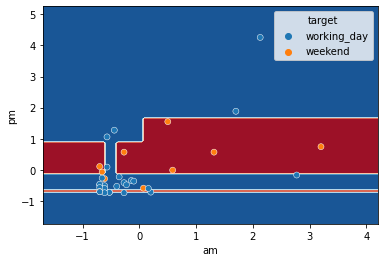

In [77]:
DecisionBoundaryDisplay.from_estimator(
        dtc,
        X=df[['am', 'pm']],
        response_method="predict",
        cmap="RdBu")
sns.scatterplot(data=df, x='am', y='pm', hue='target')

<AxesSubplot:xlabel='am', ylabel='pm'>

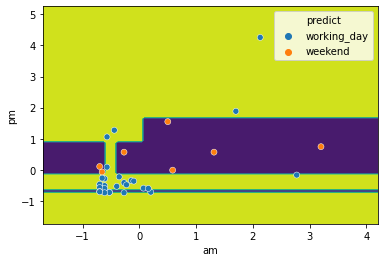

In [78]:
DecisionBoundaryDisplay.from_estimator(
        dtc,
        X=df[['am', 'pm']],
        response_method="predict")
sns.scatterplot(data=df, x='am', y='pm', hue='predict')

**5. Воспользуйтесь методом `.plot_tree()`, чтобы визуализировать само дерево.**
**Это еще один способ понять то, как работает этот алгоритм.**


- [Понимание структуры дерева решений](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)

- [Как настроить размер графика plot_tree в sklearn, чтобы сделать его читаемым?](https://stackoverflow.com/questions/59174665/how-can-i-adjust-the-size-of-the-plot-tree-graph-in-sklearn-to-make-it-readable)

- [Постройте поверхность решений деревьев решений, обученных набору данных радужной оболочки глаза](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html)

- [Решение для упражнения M5.01#](https://inria.github.io/scikit-learn-mooc/python_scripts/trees_sol_01.html)

In [79]:
from sklearn import tree
import matplotlib.pyplot as plt

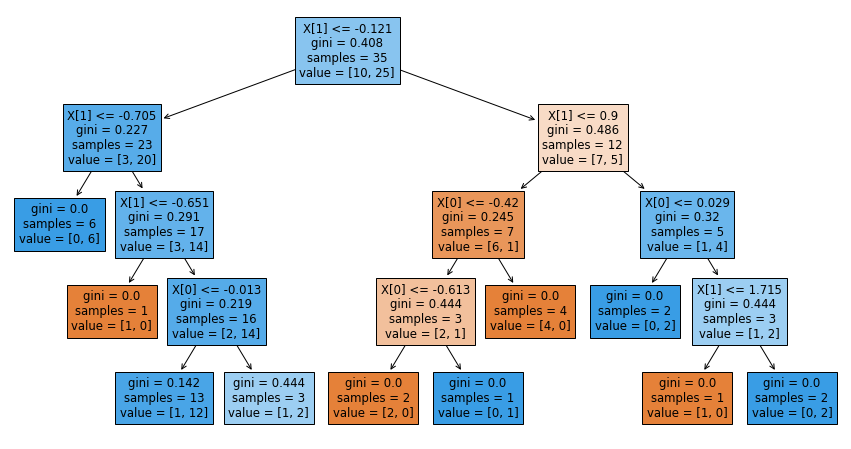

In [80]:
plt.subplots(figsize = (15, 8))
tree.plot_tree(dtc, filled=True)
plt.show()

**6. Сколько "листков" в визуализированном дереве пометили дни как `working_day`?**
**Впишите свой ответ в markdown-ячейку в конце этой секции.**

**Ответ:** 4 "листка" в визуализированном дереве пометили дни как working_day